#Introduction


This notebook is used to do challenge where I need to process unbalanced data, train two models (one with the balanced and the other with the unbalanced data) and check their metrics.

This challenge involves two datasets, one about loans and the other about breast cancer.

#Breast Cancer Dataset

##Import Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# df = pd.read_csv('https://raw.githubusercontent.com/Oscann/Datasets/main/Breast_Cancer.csv')
df = pd.read_csv('https://raw.githubusercontent.com/Oscann/Datasets/main/loans.csv')

In [ ]:
df

,issue_d,sub_grade,term,home_ownership,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,...,addr_state,initial_list_status,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line,loan_status_numeric
0,2016-07-012014-01-01,A4D1,36 months 60 months,MORTGAGEMORTGAGE,1490.0,31.0,0.0,98.8,146122.0,24.98,...,TXAR,wf,1498.0,21530.0,95784236.0,16.0,13.0,2.0,1267660.8,2
1,2016-07-012014-01-01,B5C4,36 months 60 months,RENTMORTGAGE,1400.0,51.0,0.0,162.9,127000.0,27.10,...,CAVT,wf,1408.0,13669.0,95029485.0,19.0,9.0,2.0,836352.0,2
2,2016-07-012014-01-01,D2A4,36 months 36 months,MORTGAGERENT,1360.0,64.0,1.0,52.3,115000.0,25.89,...,AZTX,ww,1368.0,13141.0,95421623.0,33.0,4.0,2.0,1007337.6,2
3,2016-07-012014-01-01,A1D1,36 months 60 months,RENTMORTGAGE,1405.0,62.0,0.0,83.9,184000.0,22.31,...,CAIN,wf,1413.0,40085.0,95243044.0,25.0,12.0,2.0,1020470.4,2
4,2016-07-012014-01-01,C4C3,60 months 36 months,MORTGAGEMORTGAGE,1380.0,29.0,1.0,111.4,167000.0,29.47,...,OHLA,wf,1388.0,6754.0,95320635.0,20.0,4.0,1.0,896832.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92776,2017-07-012015-05-01,C2A1,36 months 36 months,MORTGAGERENT,1405.0,67.0,0.0,106.2,153000.0,18.91,...,TNNH,ww,1413.0,57894.0,162870298.0,31.0,20.0,1.0,965088.0,1
92777,2017-10-012015-05-01,A5D5,36 months 60 months,MORTGAGERENT,1395.0,39.0,0.0,150.4,257000.0,25.83,...,MDNY,ww,1403.0,35753.0,168286863.0,26.0,17.0,0.0,704678.4,0
92778,2016-07-012015-05-01,D4C5,36 months 60 months,MORTGAGEMORTGAGE,1355.0,41.0,0.0,61.8,100000.0,34.64,...,ARCA,ww,1363.0,3502.0,134241149.0,16.0,13.0,1.0,688867.2,1
92779,2016-10-012015-05-01,B2A5,36 months 36 months,RENTOWN,1355.0,88.0,0.0,87.8,125000.0,18.38,...,PAOK,fw,1363.0,28067.0,141649829.0,47.0,13.0,1.0,907113.6,1


##Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

Looks like we have no NaN.

In [ ]:
print(df['Status'].unique())
print(df['Status'].value_counts())

['Alive' 'Dead']
Alive    3408
Dead      616
Name: Status, dtype: int64


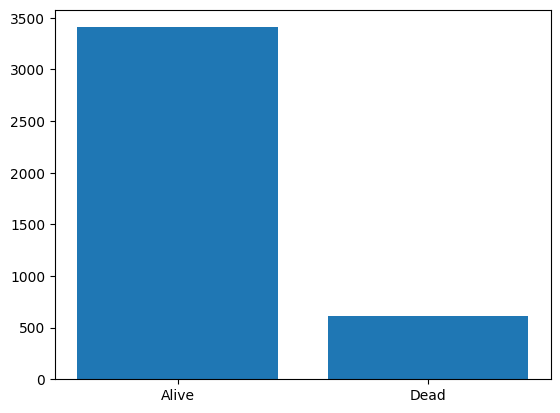

In [ ]:
plt.bar(x=['Alive', 'Dead'], height=[df['Status'].value_counts()['Alive'], df['Status'].value_counts()['Dead']])

plt.show()

As we have a huge ammount of alive women data, I'll undersample it.

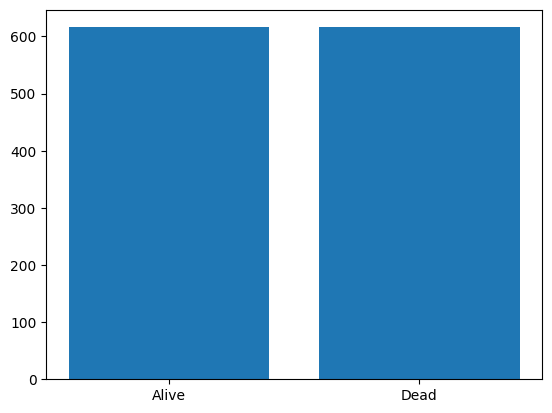

In [ ]:
copy_df = df.groupby('Status').sample(n=df.loc[df['Status'] == 'Dead'].shape[0], random_state=42)

plt.bar(x=['Alive', 'Dead'], height=[copy_df['Status'].value_counts()['Alive'], copy_df['Status'].value_counts()['Dead']])

plt.show()

I'll first make the data transformation then I'll get the sample of the df. I don't want to transform the data twice.

##Data Transformation

###Analysis of the objects columns


####Looking for badly put values

In [ ]:
for column in df:
  if df[column].dtype == 'object':
    print(column, df[column].unique())

Race ['White' 'Black' 'Other']
Marital Status ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
T Stage  ['T1' 'T2' 'T3' 'T4']
N Stage ['N1' 'N2' 'N3']
6th Stage ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
differentiate ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Grade ['3' '2' '1' ' anaplastic; Grade IV']
A Stage ['Regional' 'Distant']
Estrogen Status ['Positive' 'Negative']
Progesterone Status ['Positive' 'Negative']
Status ['Alive' 'Dead']


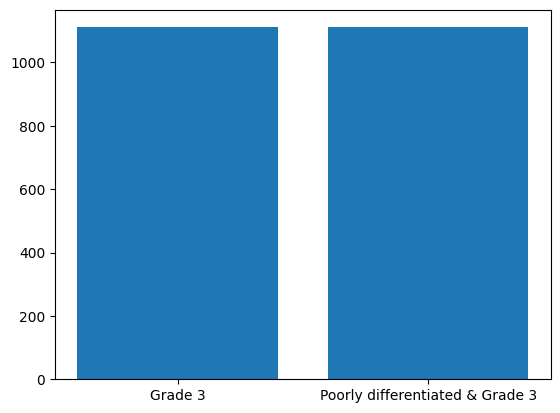

In [ ]:
plt.bar(x=['Grade 3', 'Poorly differentiated & Grade 3'], height=[df.loc[df['Grade'] == '3'].shape[0], df.loc[(df['Grade'] == '3') & (df['differentiate'] == 'Poorly differentiated')].shape[0]])
plt.show()

It's not the kind of grade I was expecting '-.-

P.S.: It is the kind of grade I was expecting, I just mistyped it xd

###Transformation


I remembered there is a function to label encode the entire dataframe

P.S.: It may not be really useful to encode all the columns the same way, besides it also encodes the numerica values as well; I'll make a function to dynamically encode it.

P.P.S.: I'll label encode some and do get_dummies to get the one hot encoding of Race and Marital Status

In [ ]:
encoding_config = {
    'T Stage ': ['T1', 'T2', 'T3', 'T4'],
    'N Stage': ['N1', 'N2', 'N3'],
    'differentiate': ['Undifferentiated', 'Poorly differentiated', 'Moderately differentiated', 'Well differentiated'],
    'Grade': ['1', '2', '3', ' anaplastic; Grade IV'],
    '6th Stage': ['IIA', 'IIIA', 'IIB', 'IIIB', 'IIC', 'IIIC'],
    'A Stage': ['Regional', 'Distant'],
    'Estrogen Status': ['Negative', 'Positive'],
    'Progesterone Status': ['Negative', 'Positive']
}

def encode_fit(df: pd.DataFrame):
  global encoding_config

  for column in df:
    if column not in encoding_config.keys():
      continue

    print(column)

    df[f"{column.lower()}_codes"] = pd.Categorical(df[column], encoding_config[column]).codes

    df.drop(column, axis=1, inplace=True)

  return df

In [ ]:
df = encode_fit(df)
df = pd.get_dummies(df, columns=['Race', 'Marital Status'])
df

T Stage 
N Stage
6th Stage
differentiate
Grade
A Stage
Estrogen Status
Progesterone Status


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,t stage _codes,n stage_codes,6th stage_codes,differentiate_codes,...,estrogen status_codes,progesterone status_codes,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,68,4,24,1,60,Alive,0,0,0,1,...,1,1,0,0,1,0,1,0,0,0
1,50,35,14,5,62,Alive,1,1,1,2,...,1,1,0,0,1,0,1,0,0,0
2,58,63,14,7,75,Alive,2,2,5,2,...,1,1,0,0,1,1,0,0,0,0
3,58,18,2,1,84,Alive,0,0,0,1,...,1,1,0,0,1,0,1,0,0,0
4,47,41,3,1,50,Alive,1,0,2,1,...,1,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,9,1,1,49,Alive,0,0,0,2,...,1,1,0,1,0,0,1,0,0,0
4020,56,46,14,8,69,Alive,1,1,1,2,...,1,1,0,0,1,1,0,0,0,0
4021,68,22,11,3,69,Alive,1,0,2,2,...,1,0,0,0,1,0,1,0,0,0
4022,58,44,11,1,72,Alive,1,0,2,2,...,1,1,1,0,0,1,0,0,0,0


In [ ]:
X.dtypes

Age                          int64
Tumor Size                   int64
Regional Node Examined       int64
Reginol Node Positive        int64
Survival Months              int64
t stage _codes                int8
n stage_codes                 int8
6th stage_codes               int8
differentiate_codes           int8
grade_codes                   int8
a stage_codes                 int8
estrogen status_codes         int8
progesterone status_codes     int8
Race_Black                   uint8
Race_Other                   uint8
Race_White                   uint8
Marital Status_Divorced      uint8
Marital Status_Married       uint8
Marital Status_Separated     uint8
Marital Status_Single        uint8
Marital Status_Widowed       uint8
dtype: object

##Some More Analysis

<Axes: >

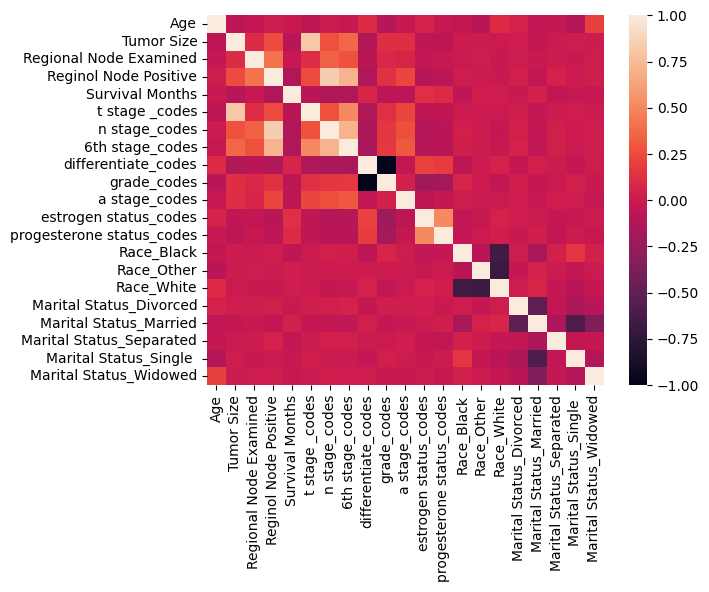

In [ ]:
sns.heatmap(X.corr())

##TRAINING THE MODEL

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

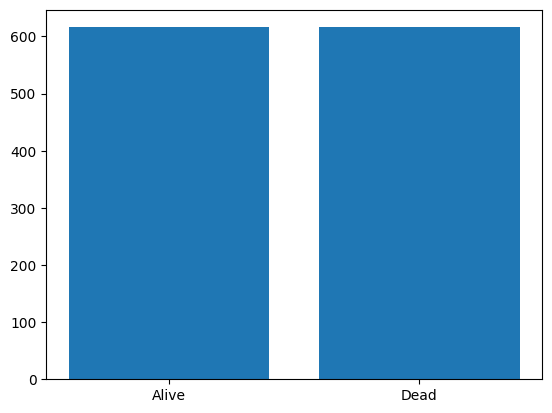

In [ ]:
sample_df = df.groupby('Status').sample(n=df.loc[df['Status'] == 'Dead'].shape[0], random_state=42)

plt.bar(x=['Alive', 'Dead'], height=[sample_df['Status'].value_counts()['Alive'], sample_df['Status'].value_counts()['Dead']])

plt.show()

###Trained on balanced data

In [ ]:
X = sample_df.drop('Status', axis=1)
Y = sample_df['Status']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

lrmodel = LogisticRegression(max_iter=1000)

lrmodel.fit(X_train, Y_train)
predictions = lrmodel.predict(X=X_test)

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

       Alive       0.78      0.82      0.80       129
        Dead       0.79      0.75      0.77       118

    accuracy                           0.79       247
   macro avg       0.79      0.78      0.78       247
weighted avg       0.79      0.79      0.78       247



###Trained on Unbalanced Data

In [ ]:
X = df.drop('Status', axis=1)
Y = df['Status']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

lrmodel = LogisticRegression(max_iter=1000)

lrmodel.fit(X_train, Y_train)
predictions = lrmodel.predict(X=X_test)

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

       Alive       0.91      0.98      0.94       685
        Dead       0.81      0.43      0.57       120

    accuracy                           0.90       805
   macro avg       0.86      0.71      0.75       805
weighted avg       0.89      0.90      0.89       805



Better results on `Alive`, but obviously biased.

#Loans Dataset

##Import libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re

In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/Oscann/Datasets/main/loans.csv')

In [17]:
pd.set_option('display.max_columns', 50)

In [57]:
df

,issue_d,sub_grade,term,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,addr_state,initial_list_status,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line,loan_status_numeric,purpose_code,home_ownership_code,verification_status_code,application_type_code
0,2016-07-01,A4,36,1490.0,31.0,0.0,98.8,146122.0,24.98,22.41,10.0,32775.0,911.64,0.0,TX,w,1498.0,21530.0,95784236.0,16.0,13.0,2.0,1267660.8,2,5,1,0,0
1,2016-07-01,B5,36,1400.0,51.0,0.0,162.9,127000.0,27.10,51.23,4.0,34175.0,868.31,0.0,CA,w,1408.0,13669.0,95029485.0,19.0,9.0,2.0,836352.0,2,8,4,2,0
2,2016-07-01,D2,36,1360.0,64.0,1.0,52.3,115000.0,25.89,33.54,4.0,14000.0,476.93,1.0,AZ,w,1368.0,13141.0,95421623.0,33.0,4.0,2.0,1007337.6,2,2,1,1,0
3,2016-07-01,A1,36,1405.0,62.0,0.0,83.9,184000.0,22.31,36.05,7.0,31600.0,869.46,0.0,CA,w,1413.0,40085.0,95243044.0,25.0,12.0,2.0,1020470.4,2,2,4,1,0
4,2016-07-01,C4,60,1380.0,29.0,1.0,111.4,167000.0,29.47,31.77,2.0,24000.0,675.89,0.0,OH,w,1388.0,6754.0,95320635.0,20.0,4.0,1.0,896832.0,1,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92776,2017-07-01,C2,36,1405.0,67.0,0.0,106.2,153000.0,18.91,46.16,3.0,40000.0,1281.88,0.0,TN,w,1413.0,57894.0,162870298.0,31.0,20.0,1.0,965088.0,1,8,1,1,0
92777,2017-10-01,A5,36,1395.0,39.0,0.0,150.4,257000.0,25.83,32.58,4.0,37000.0,1050.85,0.0,MD,w,1403.0,35753.0,168286863.0,26.0,17.0,0.0,704678.4,0,1,1,1,0
92778,2016-07-01,D4,36,1355.0,41.0,0.0,61.8,100000.0,34.64,34.91,2.0,23000.0,610.72,0.0,AR,w,1363.0,3502.0,134241149.0,16.0,13.0,1.0,688867.2,1,5,1,2,0
92779,2016-10-01,B2,36,1355.0,88.0,0.0,87.8,125000.0,18.38,41.77,2.0,21000.0,675.19,0.0,PA,f,1363.0,28067.0,141649829.0,47.0,13.0,1.0,907113.6,1,2,4,1,0


##Analysis

It's already possible to see that the dataset has a problem: it looks like it has the information of two tuples in a single one; for example, the column `issue_d` has two dates.

Talking to my teacher, he said I should only consider the first occurrence of each column value.

In [ ]:
df.info()

Not many non-numerical types.

In [19]:
for column in df:
  if (df[column].dtype == 'object' and column != 'issue_d'):
    print(column, df[column].unique())

sub_grade ['A4D1' 'B5C4' 'D2A4' ... 'F5F5' 'G5E3' 'G5D2']
term [' 36 months 60 months' ' 36 months 36 months' ' 60 months 36 months'
 ' 60 months 60 months']
home_ownership ['MORTGAGEMORTGAGE' 'RENTMORTGAGE' 'MORTGAGERENT' 'OWNMORTGAGE' 'RENTRENT'
 'OWNRENT' 'RENTOWN' 'MORTGAGEOWN' 'OWNOWN' 'ANYRENT' 'ANYMORTGAGE'
 'ANYOWN' 'NONEMORTGAGE']
purpose ['major_purchasecredit_card' 'othercredit_card'
 'debt_consolidationdebt_consolidation' 'debt_consolidationvacation'
 'credit_carddebt_consolidation' 'major_purchasedebt_consolidation'
 'debt_consolidationcar' 'otherdebt_consolidation'
 'home_improvementdebt_consolidation' 'credit_cardhome_improvement'
 'credit_cardother' 'debt_consolidationmedical'
 'debt_consolidationcredit_card' 'home_improvementother' 'othermoving'
 'home_improvementcredit_card' 'credit_cardcredit_card'
 'debt_consolidationsmall_business' 'debt_consolidationhome_improvement'
 'othermajor_purchase' 'home_improvementhouse'
 'home_improvementhome_improvement' 'movingdebt_con

Too many uniques in the `purpose` column. It may be best to write down every valid value in it.

In [29]:
#I did it manually, study after a way to do it automatically xd
purpose_values = [
    'credit_card',
    'debt_consolidation',
    'other',
    'major_purchase',
    'vacation',
    'moving',
    'home_improvement',
    'medical',
    'small_business',
    'car',
    'house',
    'renewable_energy',
    'wedding'
]

home_ownership_values = [
  'RENT',
  'MORTGAGE',
  'OWN',
  'ANY',
  'NONE'
]

verification_status_values = [
    'Verified',
    'Not Verified',
    'Source Verified'
]

application_type_values = [
    'Joint App',
    'Individual'
]

##Data transformation

###Purpose

I want to deal with it as soon as possible. I'm going to do some tests before actually transforming it. I first want to seperate the valid value and then label-encode it.

In [15]:
def getFirstValue(original_value, valid_values):
  for valid_value in valid_values:
    matches = re.findall(f'^{valid_value}', original_value)

    if len(matches) != 0:
      return matches[0]

A really slow function, but it will work for now.

In [101]:
df['purpose'] = df['purpose'].apply(lambda x : getFirstValue(x, purpose_values))

In [50]:
df

,issue_d,sub_grade,term,home_ownership,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,purpose,mort_acc,loan_amnt,application_type,installment,verification_status,pub_rec_bankruptcies,addr_state,initial_list_status,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line,loan_status_numeric
0,2016-07-01,A4,36,MORTGAGEMORTGAGE,1490.0,31.0,0.0,98.8,146122.0,24.98,22.41,major_purchase,10.0,32775.0,IndividualIndividual,911.64,Not VerifiedVerified,0.0,TX,w,1498.0,21530.0,95784236.0,16.0,13.0,2.0,1267660.8,2
1,2016-07-01,B5,36,RENTMORTGAGE,1400.0,51.0,0.0,162.9,127000.0,27.10,51.23,other,4.0,34175.0,IndividualIndividual,868.31,VerifiedVerified,0.0,CA,w,1408.0,13669.0,95029485.0,19.0,9.0,2.0,836352.0,2
2,2016-07-01,D2,36,MORTGAGERENT,1360.0,64.0,1.0,52.3,115000.0,25.89,33.54,debt_consolidation,4.0,14000.0,IndividualIndividual,476.93,Source VerifiedNot Verified,1.0,AZ,w,1368.0,13141.0,95421623.0,33.0,4.0,2.0,1007337.6,2
3,2016-07-01,A1,36,RENTMORTGAGE,1405.0,62.0,0.0,83.9,184000.0,22.31,36.05,debt_consolidation,7.0,31600.0,IndividualIndividual,869.46,Source VerifiedVerified,0.0,CA,w,1413.0,40085.0,95243044.0,25.0,12.0,2.0,1020470.4,2
4,2016-07-01,C4,60,MORTGAGEMORTGAGE,1380.0,29.0,1.0,111.4,167000.0,29.47,31.77,debt_consolidation,2.0,24000.0,IndividualIndividual,675.89,VerifiedVerified,0.0,OH,w,1388.0,6754.0,95320635.0,20.0,4.0,1.0,896832.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92776,2017-07-01,C2,36,MORTGAGERENT,1405.0,67.0,0.0,106.2,153000.0,18.91,46.16,other,3.0,40000.0,IndividualIndividual,1281.88,Source VerifiedSource Verified,0.0,TN,w,1413.0,57894.0,162870298.0,31.0,20.0,1.0,965088.0,1
92777,2017-10-01,A5,36,MORTGAGERENT,1395.0,39.0,0.0,150.4,257000.0,25.83,32.58,credit_card,4.0,37000.0,IndividualIndividual,1050.85,Source VerifiedSource Verified,0.0,MD,w,1403.0,35753.0,168286863.0,26.0,17.0,0.0,704678.4,0
92778,2016-07-01,D4,36,MORTGAGEMORTGAGE,1355.0,41.0,0.0,61.8,100000.0,34.64,34.91,major_purchase,2.0,23000.0,IndividualIndividual,610.72,VerifiedNot Verified,0.0,AR,w,1363.0,3502.0,134241149.0,16.0,13.0,1.0,688867.2,1
92779,2016-10-01,B2,36,RENTOWN,1355.0,88.0,0.0,87.8,125000.0,18.38,41.77,debt_consolidation,2.0,21000.0,IndividualIndividual,675.19,Source VerifiedNot Verified,0.0,PA,f,1363.0,28067.0,141649829.0,47.0,13.0,1.0,907113.6,1


In [102]:
le = LabelEncoder()

df['purpose_code'] = le.fit_transform(df['purpose'])
df.drop('purpose', axis=1, inplace=True)

In [24]:
df

,issue_d,sub_grade,term,home_ownership,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,mort_acc,loan_amnt,application_type,installment,verification_status,pub_rec_bankruptcies,addr_state,initial_list_status,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line,loan_status_numeric,purpose_code
0,2016-07-012014-01-01,A4D1,36 months 60 months,MORTGAGEMORTGAGE,1490.0,31.0,0.0,98.8,146122.0,24.98,22.41,10.0,32775.0,IndividualIndividual,911.64,Not VerifiedVerified,0.0,TXAR,wf,1498.0,21530.0,95784236.0,16.0,13.0,2.0,1267660.8,2,5
1,2016-07-012014-01-01,B5C4,36 months 60 months,RENTMORTGAGE,1400.0,51.0,0.0,162.9,127000.0,27.10,51.23,4.0,34175.0,IndividualIndividual,868.31,VerifiedVerified,0.0,CAVT,wf,1408.0,13669.0,95029485.0,19.0,9.0,2.0,836352.0,2,8
2,2016-07-012014-01-01,D2A4,36 months 36 months,MORTGAGERENT,1360.0,64.0,1.0,52.3,115000.0,25.89,33.54,4.0,14000.0,IndividualIndividual,476.93,Source VerifiedNot Verified,1.0,AZTX,ww,1368.0,13141.0,95421623.0,33.0,4.0,2.0,1007337.6,2,2
3,2016-07-012014-01-01,A1D1,36 months 60 months,RENTMORTGAGE,1405.0,62.0,0.0,83.9,184000.0,22.31,36.05,7.0,31600.0,IndividualIndividual,869.46,Source VerifiedVerified,0.0,CAIN,wf,1413.0,40085.0,95243044.0,25.0,12.0,2.0,1020470.4,2,2
4,2016-07-012014-01-01,C4C3,60 months 36 months,MORTGAGEMORTGAGE,1380.0,29.0,1.0,111.4,167000.0,29.47,31.77,2.0,24000.0,IndividualIndividual,675.89,VerifiedVerified,0.0,OHLA,wf,1388.0,6754.0,95320635.0,20.0,4.0,1.0,896832.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92776,2017-07-012015-05-01,C2A1,36 months 36 months,MORTGAGERENT,1405.0,67.0,0.0,106.2,153000.0,18.91,46.16,3.0,40000.0,IndividualIndividual,1281.88,Source VerifiedSource Verified,0.0,TNNH,ww,1413.0,57894.0,162870298.0,31.0,20.0,1.0,965088.0,1,8
92777,2017-10-012015-05-01,A5D5,36 months 60 months,MORTGAGERENT,1395.0,39.0,0.0,150.4,257000.0,25.83,32.58,4.0,37000.0,IndividualIndividual,1050.85,Source VerifiedSource Verified,0.0,MDNY,ww,1403.0,35753.0,168286863.0,26.0,17.0,0.0,704678.4,0,1
92778,2016-07-012015-05-01,D4C5,36 months 60 months,MORTGAGEMORTGAGE,1355.0,41.0,0.0,61.8,100000.0,34.64,34.91,2.0,23000.0,IndividualIndividual,610.72,VerifiedNot Verified,0.0,ARCA,ww,1363.0,3502.0,134241149.0,16.0,13.0,1.0,688867.2,1,5
92779,2016-10-012015-05-01,B2A5,36 months 36 months,RENTOWN,1355.0,88.0,0.0,87.8,125000.0,18.38,41.77,2.0,21000.0,IndividualIndividual,675.19,Source VerifiedNot Verified,0.0,PAOK,fw,1363.0,28067.0,141649829.0,47.0,13.0,1.0,907113.6,1,2


###Home Ownership

In [103]:
df['home_ownership'] = df['home_ownership'].apply(lambda x : getFirstValue(x, home_ownership_values))

In [82]:
df

,issue_d,term,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,addr_state,initial_list_status,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line,loan_status_numeric,sub_grade_code,purpose_code,home_ownership_code,verification_status_code,application_type_code
0,2016-07-01,36,1490.0,31.0,0.0,98.8,146122.0,24.98,22.41,10.0,32775.0,911.64,0.0,TX,w,1498.0,21530.0,95784236.0,16.0,13.0,2.0,1267660.8,2,3,5,1,0,0
1,2016-07-01,36,1400.0,51.0,0.0,162.9,127000.0,27.10,51.23,4.0,34175.0,868.31,0.0,CA,w,1408.0,13669.0,95029485.0,19.0,9.0,2.0,836352.0,2,9,8,4,2,0
2,2016-07-01,36,1360.0,64.0,1.0,52.3,115000.0,25.89,33.54,4.0,14000.0,476.93,1.0,AZ,w,1368.0,13141.0,95421623.0,33.0,4.0,2.0,1007337.6,2,16,2,1,1,0
3,2016-07-01,36,1405.0,62.0,0.0,83.9,184000.0,22.31,36.05,7.0,31600.0,869.46,0.0,CA,w,1413.0,40085.0,95243044.0,25.0,12.0,2.0,1020470.4,2,0,2,4,1,0
4,2016-07-01,60,1380.0,29.0,1.0,111.4,167000.0,29.47,31.77,2.0,24000.0,675.89,0.0,OH,w,1388.0,6754.0,95320635.0,20.0,4.0,1.0,896832.0,1,13,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92776,2017-07-01,36,1405.0,67.0,0.0,106.2,153000.0,18.91,46.16,3.0,40000.0,1281.88,0.0,TN,w,1413.0,57894.0,162870298.0,31.0,20.0,1.0,965088.0,1,11,8,1,1,0
92777,2017-10-01,36,1395.0,39.0,0.0,150.4,257000.0,25.83,32.58,4.0,37000.0,1050.85,0.0,MD,w,1403.0,35753.0,168286863.0,26.0,17.0,0.0,704678.4,0,4,1,1,1,0
92778,2016-07-01,36,1355.0,41.0,0.0,61.8,100000.0,34.64,34.91,2.0,23000.0,610.72,0.0,AR,w,1363.0,3502.0,134241149.0,16.0,13.0,1.0,688867.2,1,18,5,1,2,0
92779,2016-10-01,36,1355.0,88.0,0.0,87.8,125000.0,18.38,41.77,2.0,21000.0,675.19,0.0,PA,f,1363.0,28067.0,141649829.0,47.0,13.0,1.0,907113.6,1,6,2,4,1,0


In [104]:
df['home_ownership_code'] = le.fit_transform(df['home_ownership'])
df.drop('home_ownership', axis=1, inplace=True)

In [28]:
df

,issue_d,sub_grade,term,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,mort_acc,loan_amnt,application_type,installment,verification_status,pub_rec_bankruptcies,addr_state,initial_list_status,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line,loan_status_numeric,purpose_code,home_ownership_code
0,2016-07-012014-01-01,A4D1,36 months 60 months,1490.0,31.0,0.0,98.8,146122.0,24.98,22.41,10.0,32775.0,IndividualIndividual,911.64,Not VerifiedVerified,0.0,TXAR,wf,1498.0,21530.0,95784236.0,16.0,13.0,2.0,1267660.8,2,5,1
1,2016-07-012014-01-01,B5C4,36 months 60 months,1400.0,51.0,0.0,162.9,127000.0,27.10,51.23,4.0,34175.0,IndividualIndividual,868.31,VerifiedVerified,0.0,CAVT,wf,1408.0,13669.0,95029485.0,19.0,9.0,2.0,836352.0,2,8,4
2,2016-07-012014-01-01,D2A4,36 months 36 months,1360.0,64.0,1.0,52.3,115000.0,25.89,33.54,4.0,14000.0,IndividualIndividual,476.93,Source VerifiedNot Verified,1.0,AZTX,ww,1368.0,13141.0,95421623.0,33.0,4.0,2.0,1007337.6,2,2,1
3,2016-07-012014-01-01,A1D1,36 months 60 months,1405.0,62.0,0.0,83.9,184000.0,22.31,36.05,7.0,31600.0,IndividualIndividual,869.46,Source VerifiedVerified,0.0,CAIN,wf,1413.0,40085.0,95243044.0,25.0,12.0,2.0,1020470.4,2,2,4
4,2016-07-012014-01-01,C4C3,60 months 36 months,1380.0,29.0,1.0,111.4,167000.0,29.47,31.77,2.0,24000.0,IndividualIndividual,675.89,VerifiedVerified,0.0,OHLA,wf,1388.0,6754.0,95320635.0,20.0,4.0,1.0,896832.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92776,2017-07-012015-05-01,C2A1,36 months 36 months,1405.0,67.0,0.0,106.2,153000.0,18.91,46.16,3.0,40000.0,IndividualIndividual,1281.88,Source VerifiedSource Verified,0.0,TNNH,ww,1413.0,57894.0,162870298.0,31.0,20.0,1.0,965088.0,1,8,1
92777,2017-10-012015-05-01,A5D5,36 months 60 months,1395.0,39.0,0.0,150.4,257000.0,25.83,32.58,4.0,37000.0,IndividualIndividual,1050.85,Source VerifiedSource Verified,0.0,MDNY,ww,1403.0,35753.0,168286863.0,26.0,17.0,0.0,704678.4,0,1,1
92778,2016-07-012015-05-01,D4C5,36 months 60 months,1355.0,41.0,0.0,61.8,100000.0,34.64,34.91,2.0,23000.0,IndividualIndividual,610.72,VerifiedNot Verified,0.0,ARCA,ww,1363.0,3502.0,134241149.0,16.0,13.0,1.0,688867.2,1,5,1
92779,2016-10-012015-05-01,B2A5,36 months 36 months,1355.0,88.0,0.0,87.8,125000.0,18.38,41.77,2.0,21000.0,IndividualIndividual,675.19,Source VerifiedNot Verified,0.0,PAOK,fw,1363.0,28067.0,141649829.0,47.0,13.0,1.0,907113.6,1,2,4


###Verification Status

In [105]:
df['verification_status'] = df['verification_status'].apply(lambda x : getFirstValue(x, verification_status_values))

In [ ]:
df

In [106]:
df['verification_status_code'] = le.fit_transform(df['verification_status'])
df.drop('verification_status', axis=1, inplace=True)

In [ ]:
df

###Application Type

In [107]:
df['application_type'] = df['application_type'].apply(lambda x : getFirstValue(x, application_type_values))
df['application_type_code'] = le.fit_transform(df['application_type'])
df.drop('application_type', axis=1, inplace=True)
df

,issue_d,sub_grade,term,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,addr_state,initial_list_status,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line,loan_status_numeric,purpose_code,home_ownership_code,verification_status_code,application_type_code
0,2016-07-012014-01-01,A4D1,36 months 60 months,1490.0,31.0,0.0,98.8,146122.0,24.98,22.41,10.0,32775.0,911.64,0.0,TXAR,wf,1498.0,21530.0,95784236.0,16.0,13.0,2.0,1267660.8,2,5,1,0,0
1,2016-07-012014-01-01,B5C4,36 months 60 months,1400.0,51.0,0.0,162.9,127000.0,27.10,51.23,4.0,34175.0,868.31,0.0,CAVT,wf,1408.0,13669.0,95029485.0,19.0,9.0,2.0,836352.0,2,8,4,2,0
2,2016-07-012014-01-01,D2A4,36 months 36 months,1360.0,64.0,1.0,52.3,115000.0,25.89,33.54,4.0,14000.0,476.93,1.0,AZTX,ww,1368.0,13141.0,95421623.0,33.0,4.0,2.0,1007337.6,2,2,1,1,0
3,2016-07-012014-01-01,A1D1,36 months 60 months,1405.0,62.0,0.0,83.9,184000.0,22.31,36.05,7.0,31600.0,869.46,0.0,CAIN,wf,1413.0,40085.0,95243044.0,25.0,12.0,2.0,1020470.4,2,2,4,1,0
4,2016-07-012014-01-01,C4C3,60 months 36 months,1380.0,29.0,1.0,111.4,167000.0,29.47,31.77,2.0,24000.0,675.89,0.0,OHLA,wf,1388.0,6754.0,95320635.0,20.0,4.0,1.0,896832.0,1,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92776,2017-07-012015-05-01,C2A1,36 months 36 months,1405.0,67.0,0.0,106.2,153000.0,18.91,46.16,3.0,40000.0,1281.88,0.0,TNNH,ww,1413.0,57894.0,162870298.0,31.0,20.0,1.0,965088.0,1,8,1,1,0
92777,2017-10-012015-05-01,A5D5,36 months 60 months,1395.0,39.0,0.0,150.4,257000.0,25.83,32.58,4.0,37000.0,1050.85,0.0,MDNY,ww,1403.0,35753.0,168286863.0,26.0,17.0,0.0,704678.4,0,1,1,1,0
92778,2016-07-012015-05-01,D4C5,36 months 60 months,1355.0,41.0,0.0,61.8,100000.0,34.64,34.91,2.0,23000.0,610.72,0.0,ARCA,ww,1363.0,3502.0,134241149.0,16.0,13.0,1.0,688867.2,1,5,1,2,0
92779,2016-10-012015-05-01,B2A5,36 months 36 months,1355.0,88.0,0.0,87.8,125000.0,18.38,41.77,2.0,21000.0,675.19,0.0,PAOK,fw,1363.0,28067.0,141649829.0,47.0,13.0,1.0,907113.6,1,2,4,1,0


###Values that can be get through range

Some values can be easily get by a substring of fixed length.

In [108]:
df['addr_state'] = df['addr_state'].apply(lambda x : x[:2])
df['sub_grade'] = df['sub_grade'].apply(lambda x : x[:2])
df['initial_list_status'] = df['initial_list_status'].apply(lambda x : x[0])
df['term'] = df['term'].apply(lambda x : int(x[:3]))
df['issue_d'] = df['issue_d'].apply(lambda x : x[:10])
df

,issue_d,sub_grade,term,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,addr_state,initial_list_status,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line,loan_status_numeric,purpose_code,home_ownership_code,verification_status_code,application_type_code
0,2016-07-01,A4,36,1490.0,31.0,0.0,98.8,146122.0,24.98,22.41,10.0,32775.0,911.64,0.0,TX,w,1498.0,21530.0,95784236.0,16.0,13.0,2.0,1267660.8,2,5,1,0,0
1,2016-07-01,B5,36,1400.0,51.0,0.0,162.9,127000.0,27.10,51.23,4.0,34175.0,868.31,0.0,CA,w,1408.0,13669.0,95029485.0,19.0,9.0,2.0,836352.0,2,8,4,2,0
2,2016-07-01,D2,36,1360.0,64.0,1.0,52.3,115000.0,25.89,33.54,4.0,14000.0,476.93,1.0,AZ,w,1368.0,13141.0,95421623.0,33.0,4.0,2.0,1007337.6,2,2,1,1,0
3,2016-07-01,A1,36,1405.0,62.0,0.0,83.9,184000.0,22.31,36.05,7.0,31600.0,869.46,0.0,CA,w,1413.0,40085.0,95243044.0,25.0,12.0,2.0,1020470.4,2,2,4,1,0
4,2016-07-01,C4,60,1380.0,29.0,1.0,111.4,167000.0,29.47,31.77,2.0,24000.0,675.89,0.0,OH,w,1388.0,6754.0,95320635.0,20.0,4.0,1.0,896832.0,1,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92776,2017-07-01,C2,36,1405.0,67.0,0.0,106.2,153000.0,18.91,46.16,3.0,40000.0,1281.88,0.0,TN,w,1413.0,57894.0,162870298.0,31.0,20.0,1.0,965088.0,1,8,1,1,0
92777,2017-10-01,A5,36,1395.0,39.0,0.0,150.4,257000.0,25.83,32.58,4.0,37000.0,1050.85,0.0,MD,w,1403.0,35753.0,168286863.0,26.0,17.0,0.0,704678.4,0,1,1,1,0
92778,2016-07-01,D4,36,1355.0,41.0,0.0,61.8,100000.0,34.64,34.91,2.0,23000.0,610.72,0.0,AR,w,1363.0,3502.0,134241149.0,16.0,13.0,1.0,688867.2,1,5,1,2,0
92779,2016-10-01,B2,36,1355.0,88.0,0.0,87.8,125000.0,18.38,41.77,2.0,21000.0,675.19,0.0,PA,f,1363.0,28067.0,141649829.0,47.0,13.0,1.0,907113.6,1,2,4,1,0


###Sub Grades

In [109]:
df['sub_grade'].unique()

array(['A4', 'B5', 'D2', 'A1', 'C4', 'C1', 'A5', 'B3', 'B4', 'C3', 'C2',
       'A2', 'B2', 'B1', 'A3', 'D3', 'C5', 'D4', 'G4', 'D5', 'D1', 'F3',
       'F1', 'E2', 'F4', 'E4', 'E1', 'E5', 'G2', 'F5', 'F2', 'E3', 'G1',
       'G3', 'G5'], dtype=object)

It looks like it is [a-g][1-5], I may be able to make it become a number based in the characters inside, as if it was a numeric system of base 5.

In [69]:
def subgradeToNumeric(sub_grade):
  return (ord(sub_grade[0].lower()) - 97) * 5 + int(sub_grade[1]) - 1

In [110]:
df['sub_grade_code'] = df['sub_grade'].apply(subgradeToNumeric)
df.drop('sub_grade', axis=1, inplace=True)
df

,issue_d,term,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,addr_state,initial_list_status,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line,loan_status_numeric,purpose_code,home_ownership_code,verification_status_code,application_type_code,sub_grade_code
0,2016-07-01,36,1490.0,31.0,0.0,98.8,146122.0,24.98,22.41,10.0,32775.0,911.64,0.0,TX,w,1498.0,21530.0,95784236.0,16.0,13.0,2.0,1267660.8,2,5,1,0,0,3
1,2016-07-01,36,1400.0,51.0,0.0,162.9,127000.0,27.10,51.23,4.0,34175.0,868.31,0.0,CA,w,1408.0,13669.0,95029485.0,19.0,9.0,2.0,836352.0,2,8,4,2,0,9
2,2016-07-01,36,1360.0,64.0,1.0,52.3,115000.0,25.89,33.54,4.0,14000.0,476.93,1.0,AZ,w,1368.0,13141.0,95421623.0,33.0,4.0,2.0,1007337.6,2,2,1,1,0,16
3,2016-07-01,36,1405.0,62.0,0.0,83.9,184000.0,22.31,36.05,7.0,31600.0,869.46,0.0,CA,w,1413.0,40085.0,95243044.0,25.0,12.0,2.0,1020470.4,2,2,4,1,0,0
4,2016-07-01,60,1380.0,29.0,1.0,111.4,167000.0,29.47,31.77,2.0,24000.0,675.89,0.0,OH,w,1388.0,6754.0,95320635.0,20.0,4.0,1.0,896832.0,1,2,1,2,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92776,2017-07-01,36,1405.0,67.0,0.0,106.2,153000.0,18.91,46.16,3.0,40000.0,1281.88,0.0,TN,w,1413.0,57894.0,162870298.0,31.0,20.0,1.0,965088.0,1,8,1,1,0,11
92777,2017-10-01,36,1395.0,39.0,0.0,150.4,257000.0,25.83,32.58,4.0,37000.0,1050.85,0.0,MD,w,1403.0,35753.0,168286863.0,26.0,17.0,0.0,704678.4,0,1,1,1,0,4
92778,2016-07-01,36,1355.0,41.0,0.0,61.8,100000.0,34.64,34.91,2.0,23000.0,610.72,0.0,AR,w,1363.0,3502.0,134241149.0,16.0,13.0,1.0,688867.2,1,5,1,2,0,18
92779,2016-10-01,36,1355.0,88.0,0.0,87.8,125000.0,18.38,41.77,2.0,21000.0,675.19,0.0,PA,f,1363.0,28067.0,141649829.0,47.0,13.0,1.0,907113.6,1,2,4,1,0,6


###Address State

In [112]:
df['addr_state_code'] = le.fit_transform(df['addr_state'])
df.drop('addr_state', axis=1, inplace=True)
df

KeyError: 'addr_state'

###Initial List Status

In [113]:
df['initial_list_status_code'] = le.fit_transform(df['initial_list_status'])
df.drop('initial_list_status', axis=1, inplace=True)
df

,issue_d,term,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line,loan_status_numeric,purpose_code,home_ownership_code,verification_status_code,application_type_code,sub_grade_code,addr_state_code,initial_list_status_code
0,2016-07-01,36,1490.0,31.0,0.0,98.8,146122.0,24.98,22.41,10.0,32775.0,911.64,0.0,1498.0,21530.0,95784236.0,16.0,13.0,2.0,1267660.8,2,5,1,0,0,3,42,1
1,2016-07-01,36,1400.0,51.0,0.0,162.9,127000.0,27.10,51.23,4.0,34175.0,868.31,0.0,1408.0,13669.0,95029485.0,19.0,9.0,2.0,836352.0,2,8,4,2,0,9,4,1
2,2016-07-01,36,1360.0,64.0,1.0,52.3,115000.0,25.89,33.54,4.0,14000.0,476.93,1.0,1368.0,13141.0,95421623.0,33.0,4.0,2.0,1007337.6,2,2,1,1,0,16,3,1
3,2016-07-01,36,1405.0,62.0,0.0,83.9,184000.0,22.31,36.05,7.0,31600.0,869.46,0.0,1413.0,40085.0,95243044.0,25.0,12.0,2.0,1020470.4,2,2,4,1,0,0,4,1
4,2016-07-01,60,1380.0,29.0,1.0,111.4,167000.0,29.47,31.77,2.0,24000.0,675.89,0.0,1388.0,6754.0,95320635.0,20.0,4.0,1.0,896832.0,1,2,1,2,0,13,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92776,2017-07-01,36,1405.0,67.0,0.0,106.2,153000.0,18.91,46.16,3.0,40000.0,1281.88,0.0,1413.0,57894.0,162870298.0,31.0,20.0,1.0,965088.0,1,8,1,1,0,11,41,1
92777,2017-10-01,36,1395.0,39.0,0.0,150.4,257000.0,25.83,32.58,4.0,37000.0,1050.85,0.0,1403.0,35753.0,168286863.0,26.0,17.0,0.0,704678.4,0,1,1,1,0,4,19,1
92778,2016-07-01,36,1355.0,41.0,0.0,61.8,100000.0,34.64,34.91,2.0,23000.0,610.72,0.0,1363.0,3502.0,134241149.0,16.0,13.0,1.0,688867.2,1,5,1,2,0,18,2,1
92779,2016-10-01,36,1355.0,88.0,0.0,87.8,125000.0,18.38,41.77,2.0,21000.0,675.19,0.0,1363.0,28067.0,141649829.0,47.0,13.0,1.0,907113.6,1,2,4,1,0,6,37,0


###Issue Date

In [85]:
df['issue_d'].unique()

array(['2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
       '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
       '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
       '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
       '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
       '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
       '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
       '2018-11-01'], dtype=object)

In [98]:
import datetime as dt

def parse_issue_date(date):
  date = date.split('-')

  date = dt.datetime(year=int(date[0]), month=int(date[1]), day=int(date[2]))

  reference_date = dt.datetime(year=2000, month=1, day=1)

  return (date - reference_date).days


parse_issue_date('2016-12-24')

6202

In [114]:
df['issue_d_days_relative_value'] = df['issue_d'].apply(parse_issue_date)
df.drop('issue_d', axis=1, inplace=True)
df

,term,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line,loan_status_numeric,purpose_code,home_ownership_code,verification_status_code,application_type_code,sub_grade_code,addr_state_code,initial_list_status_code,issue_d_days_relative_value
0,36,1490.0,31.0,0.0,98.8,146122.0,24.98,22.41,10.0,32775.0,911.64,0.0,1498.0,21530.0,95784236.0,16.0,13.0,2.0,1267660.8,2,5,1,0,0,3,42,1,6026
1,36,1400.0,51.0,0.0,162.9,127000.0,27.10,51.23,4.0,34175.0,868.31,0.0,1408.0,13669.0,95029485.0,19.0,9.0,2.0,836352.0,2,8,4,2,0,9,4,1,6026
2,36,1360.0,64.0,1.0,52.3,115000.0,25.89,33.54,4.0,14000.0,476.93,1.0,1368.0,13141.0,95421623.0,33.0,4.0,2.0,1007337.6,2,2,1,1,0,16,3,1,6026
3,36,1405.0,62.0,0.0,83.9,184000.0,22.31,36.05,7.0,31600.0,869.46,0.0,1413.0,40085.0,95243044.0,25.0,12.0,2.0,1020470.4,2,2,4,1,0,0,4,1,6026
4,60,1380.0,29.0,1.0,111.4,167000.0,29.47,31.77,2.0,24000.0,675.89,0.0,1388.0,6754.0,95320635.0,20.0,4.0,1.0,896832.0,1,2,1,2,0,13,34,1,6026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92776,36,1405.0,67.0,0.0,106.2,153000.0,18.91,46.16,3.0,40000.0,1281.88,0.0,1413.0,57894.0,162870298.0,31.0,20.0,1.0,965088.0,1,8,1,1,0,11,41,1,6391
92777,36,1395.0,39.0,0.0,150.4,257000.0,25.83,32.58,4.0,37000.0,1050.85,0.0,1403.0,35753.0,168286863.0,26.0,17.0,0.0,704678.4,0,1,1,1,0,4,19,1,6483
92778,36,1355.0,41.0,0.0,61.8,100000.0,34.64,34.91,2.0,23000.0,610.72,0.0,1363.0,3502.0,134241149.0,16.0,13.0,1.0,688867.2,1,5,1,2,0,18,2,1,6026
92779,36,1355.0,88.0,0.0,87.8,125000.0,18.38,41.77,2.0,21000.0,675.19,0.0,1363.0,28067.0,141649829.0,47.0,13.0,1.0,907113.6,1,2,4,1,0,6,37,0,6118


###Checking...

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92781 entries, 0 to 92780
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   term                         92781 non-null  int64  
 1   fico_range_low               92781 non-null  float64
 2   total_acc                    92781 non-null  float64
 3   pub_rec                      92781 non-null  float64
 4   revol_util                   92781 non-null  float64
 5   annual_inc                   92781 non-null  float64
 6   int_rate                     92781 non-null  float64
 7   dti                          92781 non-null  float64
 8   mort_acc                     92781 non-null  float64
 9   loan_amnt                    92781 non-null  float64
 10  installment                  92781 non-null  float64
 11  pub_rec_bankruptcies         92781 non-null  float64
 12  fico_range_high              92781 non-null  float64
 13  revol_bal       

##Some more Analysis

<Axes: >

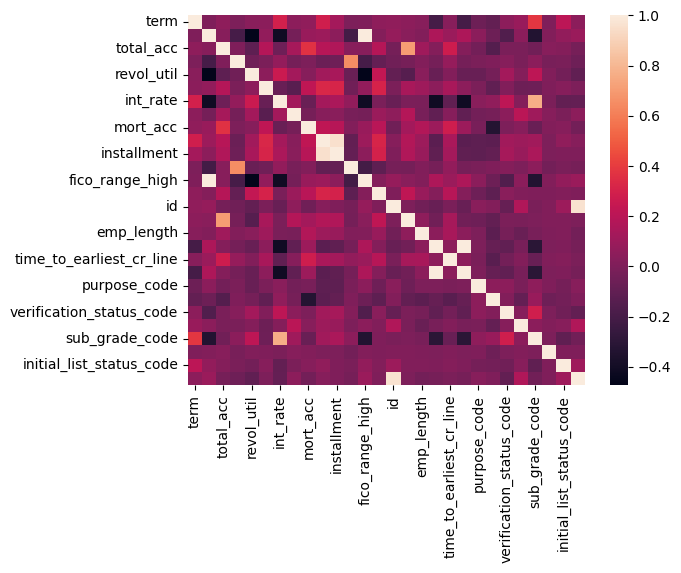

In [116]:
sns.heatmap(df.corr())

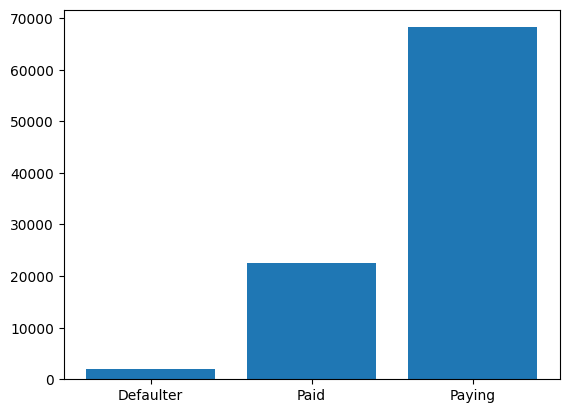

2.0    68225
1.0    22630
0.0     1926
Name: loan_status, dtype: int64

In [123]:
copy_df = df.drop('id', axis=1)

count_classes = copy_df['loan_status'].value_counts()

plt.bar(x=["Defaulter", "Paid", "Paying"], height=[
    count_classes[0],
    count_classes[1],
    count_classes[2]
  ])
plt.show()
count_classes

##Training

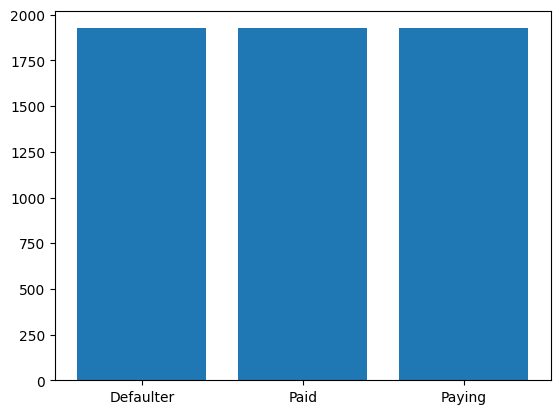

0.0    1926
1.0    1926
2.0    1926
Name: loan_status, dtype: int64

In [128]:
sampled_df = copy_df.groupby('loan_status').sample(count_classes[0], random_state=42)

sampled_count_classes = sampled_df['loan_status'].value_counts()

plt.bar(x=["Defaulter", "Paid", "Paying"], height=[
    sampled_count_classes[0],
    sampled_count_classes[1],
    sampled_count_classes[2]
  ])
plt.show()
sampled_count_classes

###Undersampled Data Training

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.53      0.57      0.55       409
         1.0       0.32      0.24      0.27       360
         2.0       0.51      0.59      0.55       387

    accuracy                           0.47      1156
   macro avg       0.45      0.47      0.46      1156
weighted avg       0.46      0.47      0.46      1156

Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       409
         1.0       1.00      1.00      1.00       360
         2.0       1.00      1.00      1.00       387

    accuracy                           1.00      1156
   macro avg       1.00      1.00      1.00      1156
weighted avg       1.00      1.00      1.00      1156



[Text(0.6, 0.8333333333333334, 'x[17] <= 1.5\ngini = 0.667\nsamples = 4622\nvalue = [1517, 1566, 1539]'),
 Text(0.4, 0.5, 'x[17] <= 0.5\ngini = 0.5\nsamples = 3083\nvalue = [1517, 1566, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1517\nvalue = [1517, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1566\nvalue = [0, 1566, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 1539\nvalue = [0, 0, 1539]')]

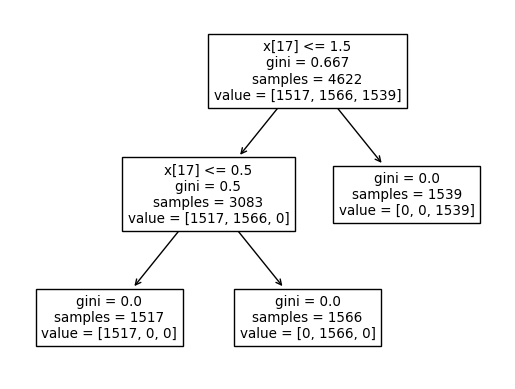

In [139]:
X = sampled_df.drop('loan_status', axis=1)
Y = sampled_df['loan_status']

lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Logistic Regression
lr.fit(x_train, y_train)

lr_predicts = lr.predict(x_test)
print("Logistic Regression")
print(classification_report(y_test, lr_predicts))

#Decision Tree
dt.fit(x_train, y_train)

dt_predictions = dt.predict(x_test)
print("Decision Tree")
print(classification_report(y_test, dt_predictions))

plot_tree(dt)

The proof that LogisticRegression works better with binary outcomes I needed to see.

###Normal data Training

In [137]:
X = copy_df.drop('loan_status', axis=1)
Y = copy_df['loan_status']

lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Logistic Regression
lr.fit(x_train, y_train)

lr_predicts = lr.predict(x_test)
print("Logistic Regression")
print(classification_report(y_test, lr_predicts))

#Decision Tree
dt.fit(x_train, y_train)

dt_predictions = dt.predict(x_test)
print("Decision Tree")
print(classification_report(y_test, dt_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       390
         1.0       0.39      0.04      0.07      4536
         2.0       0.74      0.98      0.84     13631

    accuracy                           0.73     18557
   macro avg       0.38      0.34      0.30     18557
weighted avg       0.64      0.73      0.64     18557

Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       390
         1.0       1.00      1.00      1.00      4536
         2.0       1.00      1.00      1.00     13631

    accuracy                           1.00     18557
   macro avg       1.00      1.00      1.00     18557
weighted avg       1.00      1.00      1.00     18557



The decision tree still had a really good accuracy; maybe I did something wrong.